## Imports



In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

## Loading Dataset

In [56]:
file_path = "steps_tracker_dataset.csv"  # Ensure the file is in the working directory
df = pd.read_csv(file_path)

In [103]:
#If any missing columns 
print(df.head())
print (df.isna().sum())
print (df.dropna())
print (df.info())

#Convering the date column to the correct format
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")
print (df.info())

        date     steps  distance_km  calories_burned  active_minutes  \
0 2022-10-08  0.206535     0.206551         0.206535           0.205   
1 2022-06-11  0.014885     0.014706         0.014885           0.015   
2 2022-01-28  0.330577     0.330882         0.330577           0.330   
3 2022-03-23  0.556808     0.556818         0.556808           0.555   
4 2022-05-20  0.134917     0.135027         0.134917           0.135   

   sleep_hours  water_intake_liters  mood_encoded  
0     0.831461             0.752016             3  
1     0.325843             0.375000             2  
2     0.325843             0.895161             2  
3     0.550562             0.209677             4  
4     0.202247             0.193548             4  
date                   0
steps                  0
distance_km            0
calories_burned        0
active_minutes         0
sleep_hours            0
water_intake_liters    0
mood_encoded           0
dtype: int64
          date     steps  distance_km  cal

In [58]:
# Step 3: Handle Categorical Data (Encoding 'mood')
label_encoder = LabelEncoder()
df['mood_encoded'] = label_encoder.fit_transform(df['mood'])
df.drop(columns=['mood'], inplace=True)


In [59]:
# Step 4: Normalize Numerical Features
scaler = MinMaxScaler()
numerical_cols = ['steps', 'distance_km', 'calories_burned', 'active_minutes', 'sleep_hours', 'water_intake_liters']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [60]:
# Step 5: Save Preprocessed Data
df.to_excel("preprocessed_steps_tracker.xlsx", index=False)

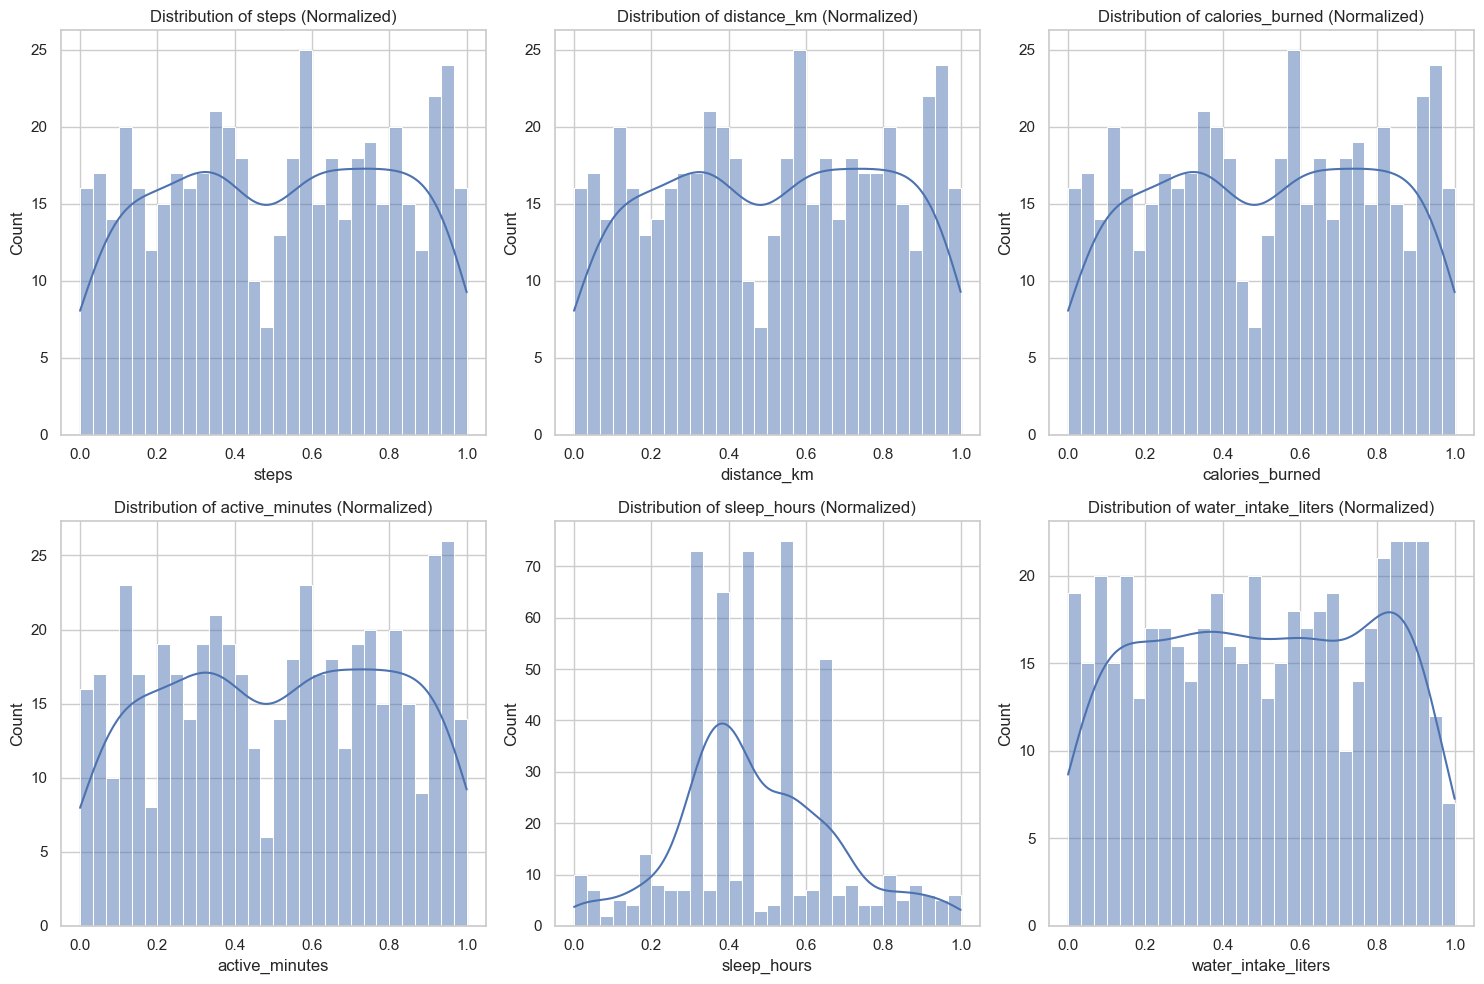

In [67]:
# Step 6: Generate and Save Distribution Plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Distribution of {col} (Normalized)")

plt.tight_layout()
plt.savefig("preprocessing_plots.png")
plt.show()

In [71]:
# Step 6: Display the first few rows of the cleaned dataset
print(df.head())

        date     steps  distance_km  calories_burned  active_minutes  \
0 2022-10-08  0.206535     0.206551         0.206535           0.205   
1 2022-06-11  0.014885     0.014706         0.014885           0.015   
2 2022-01-28  0.330577     0.330882         0.330577           0.330   
3 2022-03-23  0.556808     0.556818         0.556808           0.555   
4 2022-05-20  0.134917     0.135027         0.134917           0.135   

   sleep_hours  water_intake_liters  mood_encoded  
0     0.831461             0.752016             3  
1     0.325843             0.375000             2  
2     0.325843             0.895161             2  
3     0.550562             0.209677             4  
4     0.202247             0.193548             4  


In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random state = 42